In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir

In [2]:
isis = [
    6, 15, 4, 3, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 14
]
d1 = list(np.concatenate([isi*[0]+[1] for isi in isis]))[:100]
d = jnp.array([[e] + 9*[0] for e in d1], dtype=jnp.uint8).reshape(1, -1)

In [3]:
data = jnp.expand_dims(d, -1)

In [4]:
data.flatten()

Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
data.shape

(1, 1000, 1)

In [6]:
data.sum()

Array(34, dtype=uint32)

In [7]:
#data = jnp.ones_like(data)

In [8]:
nir_net = nir.read("./lif_norse.nir")

In [9]:
nir_net.nodes

{'0': Affine(weight=array([[1.]], dtype=float32), bias=array([0.], dtype=float32)),
 '1': LIF(tau=array([0.0025], dtype=float32), r=array([1.], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([0.1], dtype=float32)),
 'input': Input(input_type={'input': array([1])}),
 'output': Output(output_type={'output': array([1])})}

In [10]:
SNN, params = spyx.nir.from_nir(nir_net, data.astype(jnp.float16), dt=1e-4, return_all_states=True)
params

{'linear': {'w': Array([[0.04]], dtype=float32),
  'b': Array([0.], dtype=float32)},
 'LIF': {'beta': array([0.96], dtype=float32)}}

In [11]:
spikes, voltage_trace = SNN.apply(params, data)

In [12]:
spikes.sum()

Array(0., dtype=float32)

In [16]:
voltage_trace[0].flatten()[60:70]

Array([0.04      , 0.0264    , 0.017424  , 0.01149984, 0.0075899 ,
       0.00500933, 0.00330616, 0.00218206, 0.00144016, 0.00095051],      dtype=float32)

[]

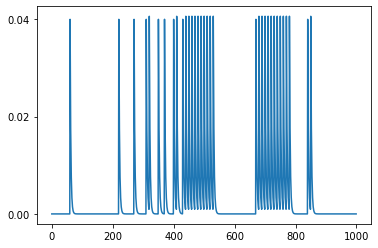

In [14]:
import matplotlib.pyplot as plt
plt.plot(voltage_trace[0].flatten())
plt.yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])
plt.plot()

In [15]:
out[1]

NameError: name 'out' is not defined